<div style="background: linear-gradient(90deg, #6a040f, #d00000); padding: 30px;  border-radius:15px; text-align: center;">
  <h1 style="color: white; font-size: 48px; font-weight: bold; margin: 0; font-family: Arial, sans-serif;">
    E-commerce User Segmentation Strategy for Business Growth
  </h1>

</div>

<a id='target'></a>
## <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#d00000; overflow:hidden"><b> 1. Introduction  </b></div>

## About Dataset

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

## Business Problem

In today’s competitive market, businesses must go beyond generic strategies to effectively engage customers.These are the key challenges that we can solve to gain customer attention, Addressing these issues through data-driven insights allows companies to enhance marketing efficiency, improve customer satisfaction, and maximize profitability.

1) Customer Segmentation
2) Campaign Response Prediction
3) Product Recommendation Optimization
4) High-Value Customer Identification

## Analytical Approach

Our analytic approach focuses on developing a predictive model to predict rainfall is going to occur or not. We will analyze historical weather data, perform data preprocessing, feature engineering, and test various machine learning algorithms. We also used Artificial Neural Network(ANN) to increase overall accuracy.

<a id='target'></a>
## <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#d00000; overflow:hidden"><b> 2. Importing Required Libraries   </b></div>

In [1]:
# 📦 Basic Libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# ⚠️ Warnings Control
import warnings
warnings.filterwarnings('ignore')

# 🧪 Model Selection
from sklearn.model_selection import train_test_split

# ⚙️ Preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder


# 🤖 Machine Learning Algorithms

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn import decomposition
from sklearn.decomposition import PCA

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage,dendrogram


from yellowbrick.cluster import KElbowVisualizer , SilhouetteVisualizer

<a id='target'></a>
## <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#d00000; overflow:hidden"><b> 3. Reading and Understanding our Data   </b></div>

In [2]:
df = pd.read_csv('/kaggle/input/marketing-dataset-new/marketing_campaign.csv')

## How data look like

In [3]:
df.head(2)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0



**The columns in the dataset can be explained as follows:**

**Dataset Descriptions:**     
- **'marketing_campaign.csv' :** 2240 rows and 29      

| STT | Attribute Name          | Meaning                                                           |
|:---:|:------------------------|:------------------------------------------------------------------|
|People|
| 1   | ID                      | Customer's unique identifier                                      |
| 2   | Year_Birth              | Customer's birth year                                             |
| 3   | Education               | Customer's education level                                        |
| 4   | Marital_Status          | Customer's marital status                                         |
| 5   | Income                  | Customer's yearly household income                                |
| 6   | Kidhome                 | Number of children in customer's household                        |
| 7   | Teenhome                | Number of teenagers in customer's household                       |
| 8   | Dt_Customer             | Date of customer's enrollment with the company                    |
| 9   | Recency                 | Number of days since customer's last purchase                     |
| 10  | Complain                | 1 if the customer complained in the last 2 years, 0 otherwise     |
|Products|
| 11  | MntWines                | Amount spent on wine in last 2 years                              |
| 12  | MntFruits               | Amount spent on fruits in last 2 years                            |
| 13  | MntMeatProducts         | Amount spent on meat in last 2 years                              |
| 14  | MntFishProducts         | Amount spent on fish in last 2 years                              |
| 15  | MntSweetProducts        | Amount spent on sweets in last 2 years                            |
| 16  | MntGoldProds            | Amount spent on gold in last 2 years                              |
|Promotion|
| 17  | NumDealsPurchases       | Number of purchases made with a discount                          |
| 18  | AcceptedCmp1            | 1 if customer accepted the offer in the 1st campaign, 0 otherwise |
| 19  | AcceptedCmp2            | 1 if customer accepted the offer in the 2nd campaign, 0 otherwise |
| 20  | AcceptedCmp3            | 1 if customer accepted the offer in the 3rd campaign, 0 otherwise |
| 21  | AcceptedCmp4            | 1 if customer accepted the offer in the 4th campaign, 0 otherwise |
| 22  | AcceptedCmp5            | 1 if customer accepted the offer in the 5th campaign, 0 otherwise |
| 23  | Response                | 1 if customer accepted the offer in the last campaign, 0 otherwise|
|Place|
| 24  | NumWebPurchases         | Number of purchases made through the company’s website             |
| 25  | NumCatalogPurchases     | Number of purchases made using a catalogue                        |
| 26  | NumStorePurchases       | Number of purchases made directly in stores                       |
| 27  | NumWebVisitsMonth       | Number of visits to company’s website in the last month           
|Target|
| 28  | Target                  | Need to perform clustering to summarize customer segments         |


## Shape of data

In [4]:
print(f'df_shape: {df.shape}')

df_shape: (2240, 29)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

## Check duplicate value¶

In [6]:
df.duplicated().sum()

0

## Check null values in data

In [7]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

## Detail of data¶

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


## No of Unique Values

In [9]:
df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

<a id='target'></a>
## <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#d00000; overflow:hidden"><b> 4. EDA & Data Preprocessing </b></div>

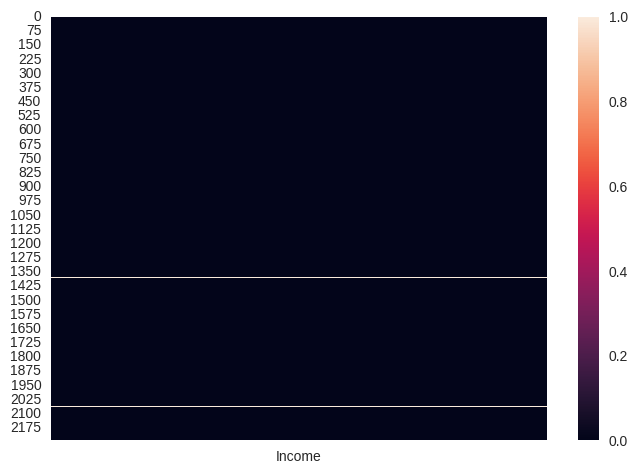

In [10]:
sns.heatmap(df[['Income']].isnull())
plt.show()

In [11]:
# we replace the null values with median why median all the null values are randomly split
median = df['Income'].median()
df['Income'] = df['Income'].fillna(median)

In [12]:
# dtypes is object convert into datetime
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"],format='%d-%m-%Y') # pandas convert it into ISO format

In [13]:
print(f'Max Date: {max(df["Dt_Customer"])}')
print(f'Min Date: {min(df["Dt_Customer"])}')

Max Date: 2014-06-29 00:00:00
Min Date: 2012-07-30 00:00:00


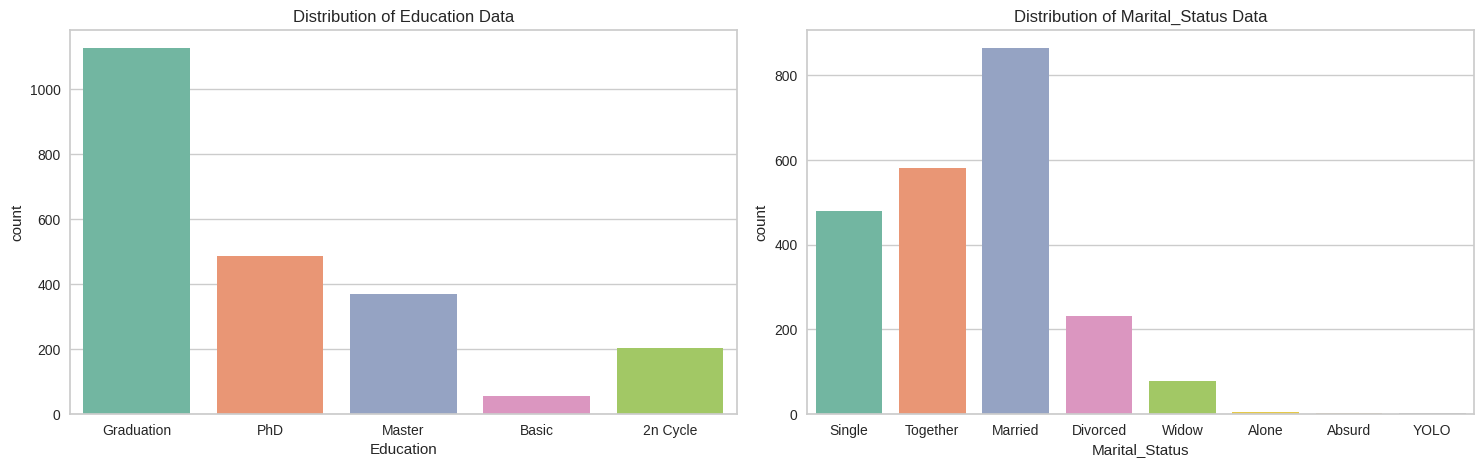

In [14]:
# Visual representation of categorical columns

cat_features = df.select_dtypes("object")
plt.figure(figsize=(15,40))

for i, col in enumerate(cat_features,1):  
    plt.subplot(9, 2, i)
    plt.title(f"Distribution of {col} Data")
    sns.countplot(x=col, data=df, palette='Set2') 
    plt.tight_layout()
plt.show()

### There are 5 categories in Education convert into 3 category makes more relevant,same goes for Maritial_Status into 2 category.

In [15]:
num_features = df.select_dtypes("number").columns
num_features

Index(['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Response'],
      dtype='object')

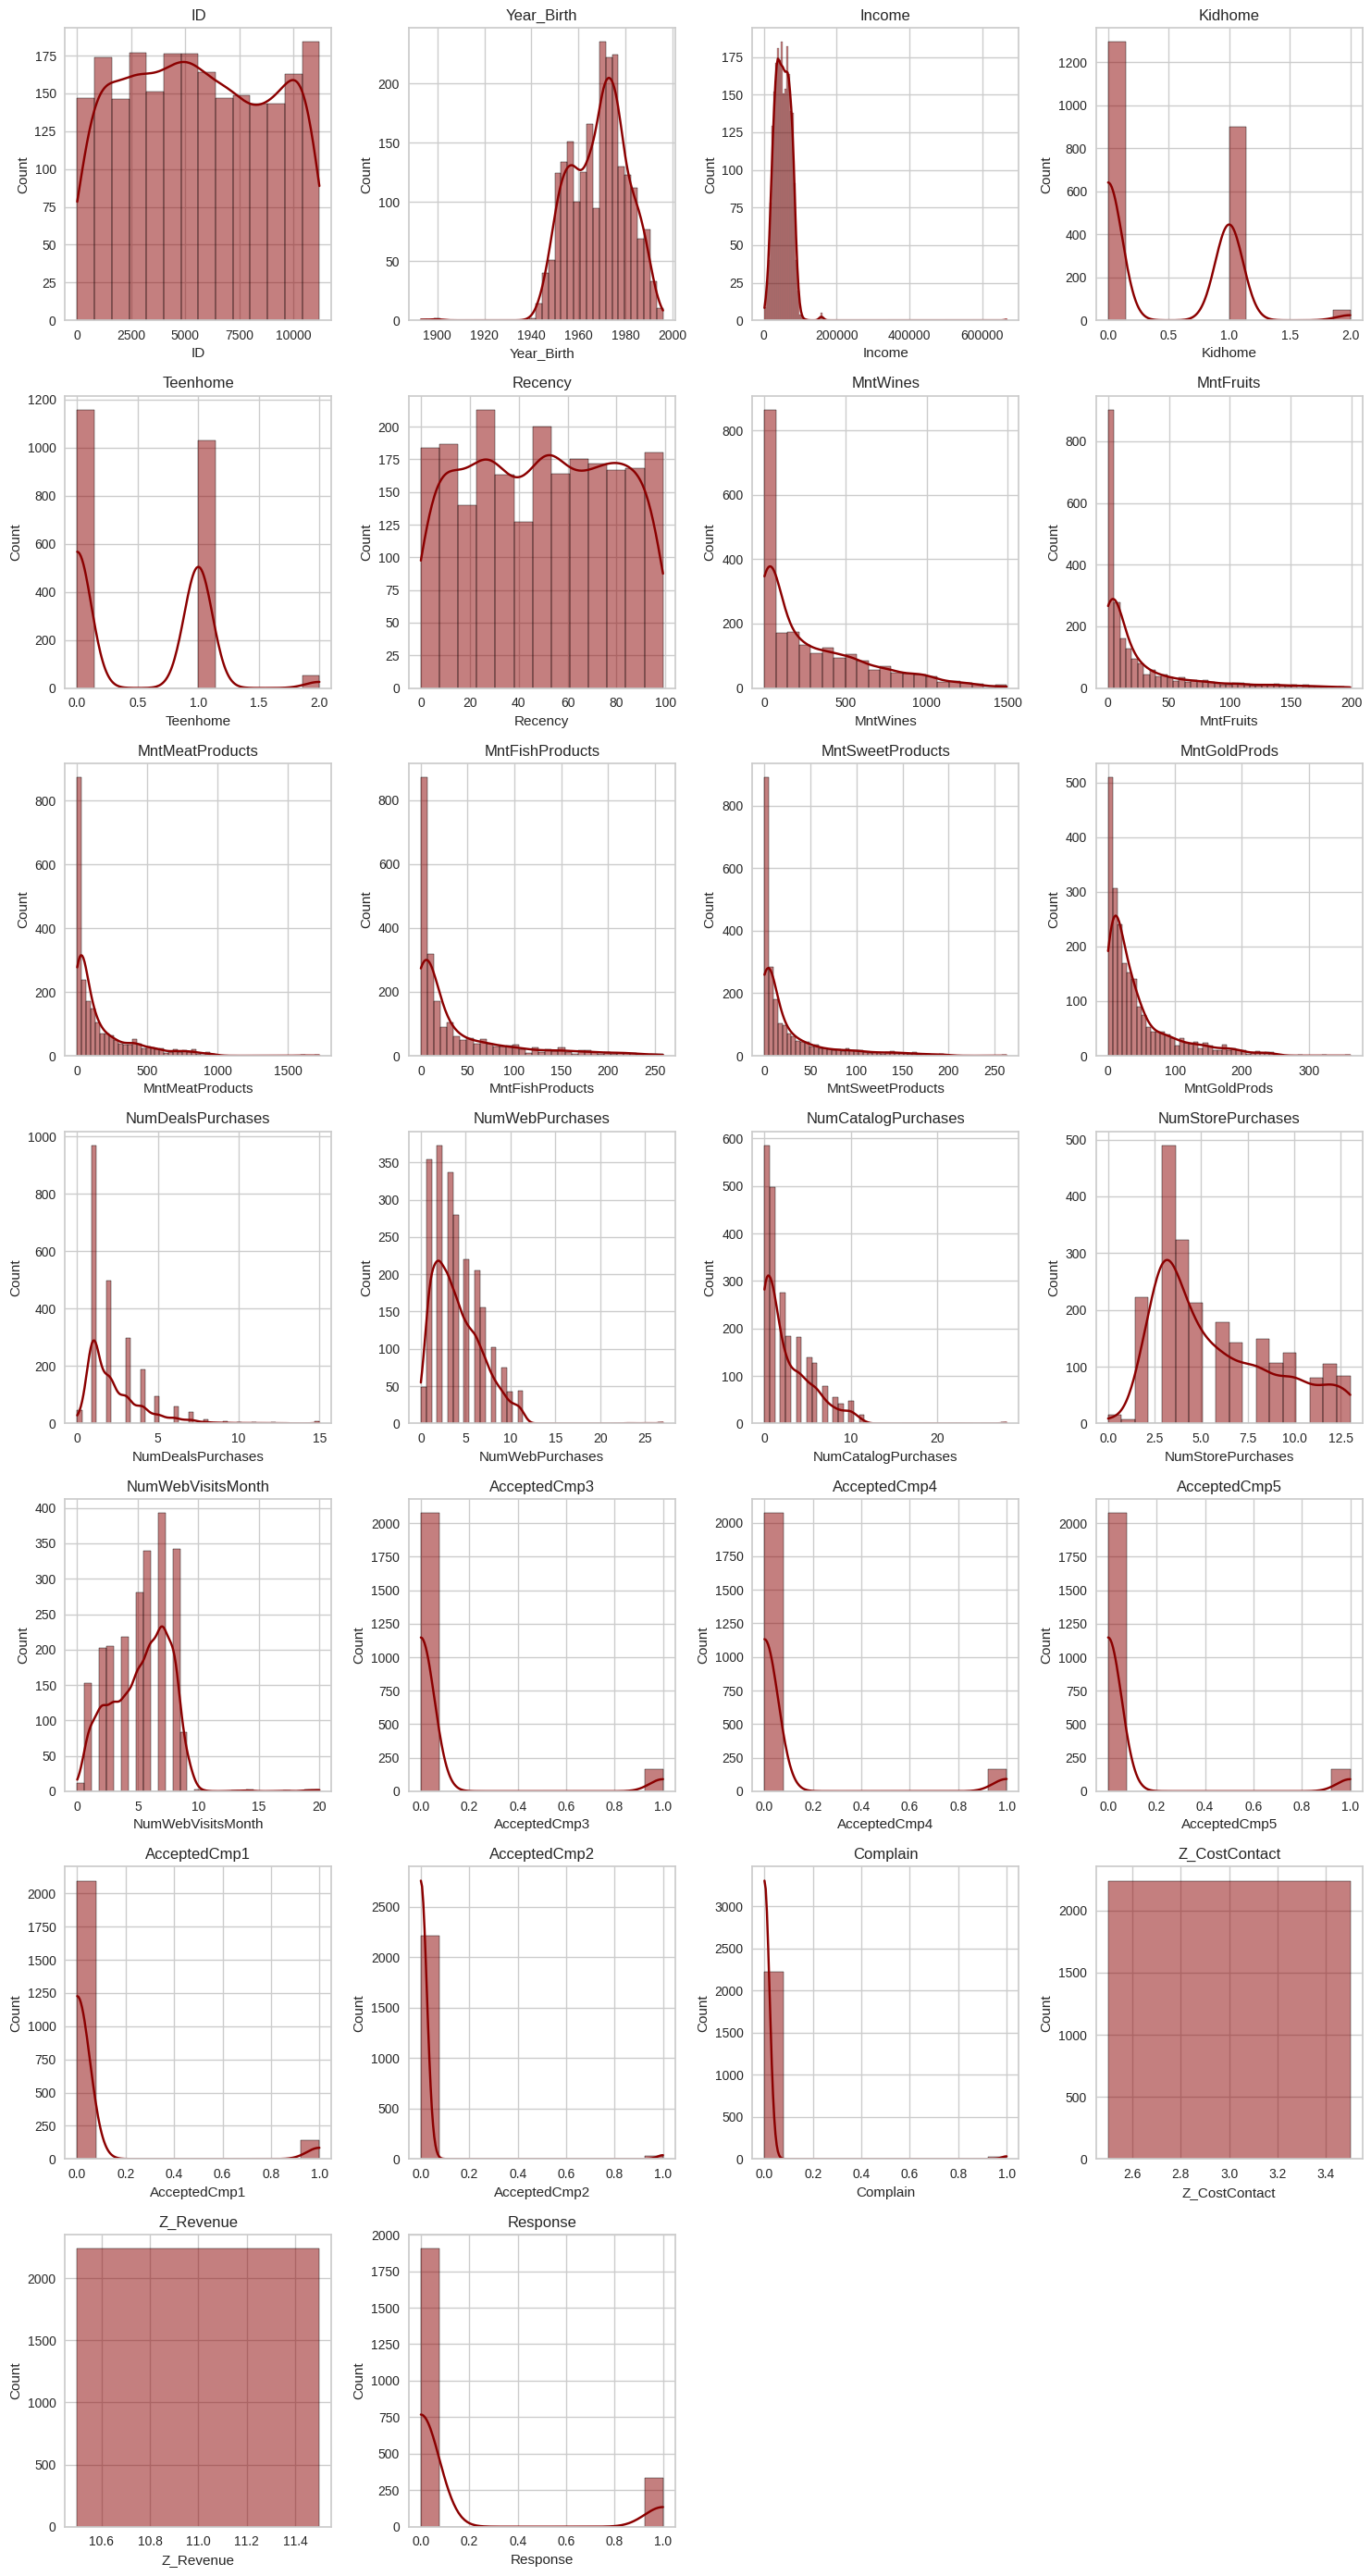

In [16]:
num_features = df.select_dtypes("number").columns

def show_numericalplot(data):
    len_data = len(data)
    num_cols = 4
    num_rows = (len_data + num_cols - 1) // num_cols
    plt.figure(figsize=(15, 4*num_rows))
    
    for i,col in enumerate(data):
        plt.subplot(num_rows,num_cols,i+1)
        sns.histplot(df[col],color='darkred',kde=True)
        plt.title(col)
        
    plt.tight_layout()
    plt.show()
    
show_numericalplot(num_features)

<a id='target'></a>
## <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#d00000; overflow:hidden"><b> 5. Feature Engineering </b></div>

In [17]:
df.head(2)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0


In [18]:
# Feature Engineering for object column
df["Education"] = df["Education"].replace({
    "Basic": "Undergraduate",
    "2n Cycle": "Undergraduate",
    "Graduation": "Graduate",
    "Master": "Postgraduate",
    "PhD": "Postgraduate"
})


df["Living_With"] = df["Marital_Status"].replace({
    "Married": "Partner",
    "Together": "Partner",
    "Absurd": "Alone",
    "Widow": "Alone",
    "YOLO": "Alone",
    "Divorced": "Alone",
    "Single": "Alone",
})

df = df.drop(columns='Marital_Status',axis=1)

In [19]:
# We translate the year of birth into the age column for better perception by the model.

df["Age"] = 2025 - df["Year_Birth"]
df = df.drop("Year_Birth", axis=1)

df = df[(df["Age"]<100)]

# Total Spending Added
df['Total_Spending'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

# Number of children added 
df["Total_Children"]= df["Kidhome"] + df["Teenhome"]

# Calculating household size
df['Family_Size'] = df["Living_With"].replace({"Alone": 1, "Partner":2})+ df['Kidhome'] + df['Teenhome']

# Dropping some of the redundant features
df = df.drop(["Z_CostContact", "Z_Revenue"], axis=1)

# How many camp accepted
df['TotalAcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']

# No of Total Purchase
df['NumTotalPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']

print(f'DatasetShape: {df.shape}')

DatasetShape: (2237, 32)


In [20]:
df.skew(numeric_only=True)

ID                      0.040194
Income                  6.806236
Kidhome                 0.635078
Teenhome                0.406646
Recency                -0.003416
MntWines                1.176567
MntFruits               2.104978
MntMeatProducts         2.085896
MntFishProducts         1.920677
MntSweetProducts        2.136315
MntGoldProds            1.885801
NumDealsPurchases       2.416913
NumWebPurchases         1.381799
NumCatalogPurchases     1.882130
NumStorePurchases       0.700817
NumWebVisitsMonth       0.207573
AcceptedCmp3            3.288924
AcceptedCmp4            3.238819
AcceptedCmp5            3.301716
AcceptedCmp1            3.552527
AcceptedCmp2            8.466190
Complain               10.440555
Response                1.969344
Age                     0.093266
Total_Spending          0.860777
Total_Children          0.415523
Family_Size             0.085797
TotalAcceptedCmp        2.723260
NumTotalPurchases       0.251039
dtype: float64

In [21]:
# There are no negative values that means almost that dataset are right skewed.
# Skewed data check 
df_numeric = df.select_dtypes('number').columns
right_skew = 0.75
Numeric_columns = []
skewed = []
for i in df_numeric:
    if df[i].skew() > right_skew:
        Numeric_columns.append(i)
        skewed.append(df[i].skew())
print(pd.DataFrame({'Numeric_columns':Numeric_columns,'Skewed':skewed}))

        Numeric_columns     Skewed
0                Income   6.806236
1              MntWines   1.176567
2             MntFruits   2.104978
3       MntMeatProducts   2.085896
4       MntFishProducts   1.920677
5      MntSweetProducts   2.136315
6          MntGoldProds   1.885801
7     NumDealsPurchases   2.416913
8       NumWebPurchases   1.381799
9   NumCatalogPurchases   1.882130
10         AcceptedCmp3   3.288924
11         AcceptedCmp4   3.238819
12         AcceptedCmp5   3.301716
13         AcceptedCmp1   3.552527
14         AcceptedCmp2   8.466190
15             Complain  10.440555
16             Response   1.969344
17       Total_Spending   0.860777
18     TotalAcceptedCmp   2.723260


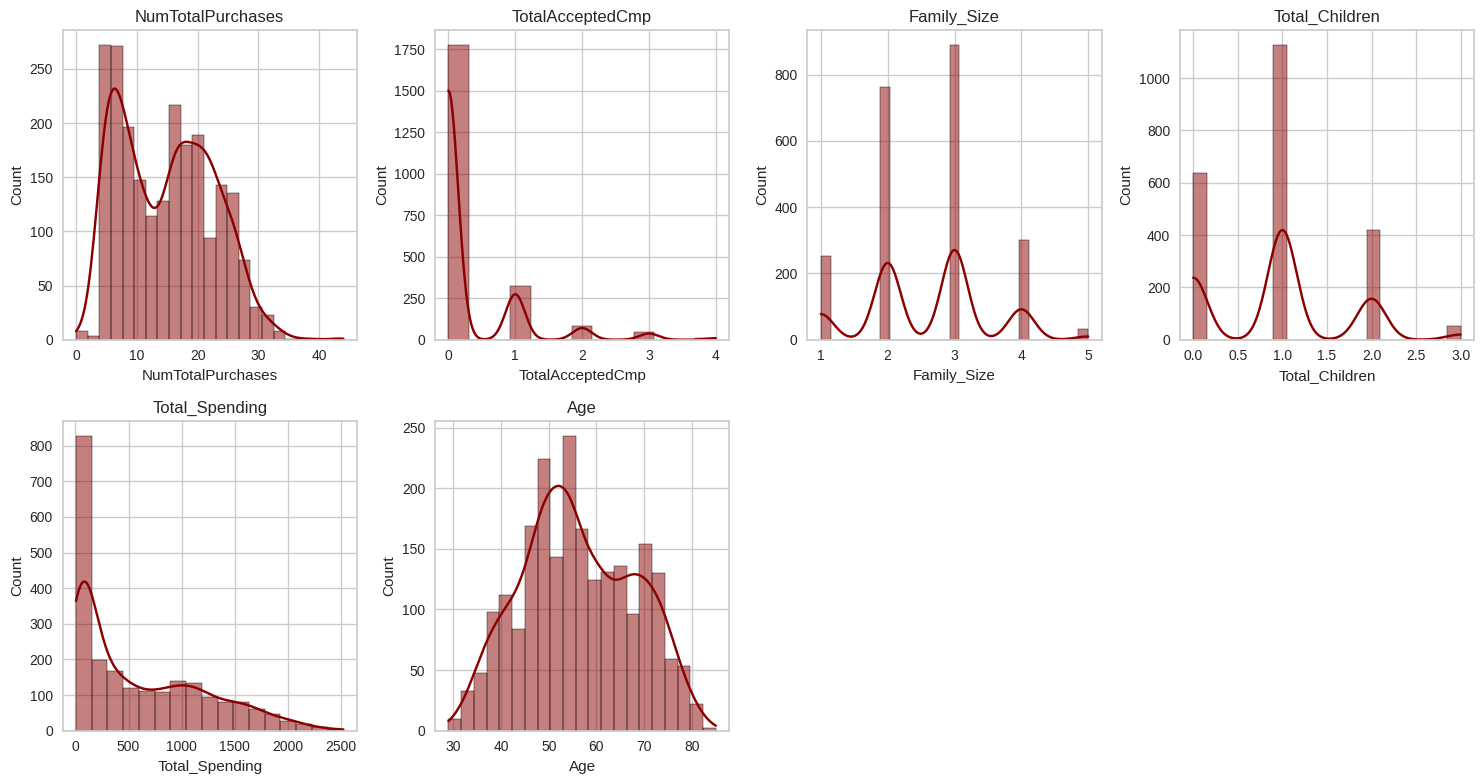

In [22]:
df_new_col = ['NumTotalPurchases','TotalAcceptedCmp','Family_Size','Total_Children','Total_Spending','Age']


def new_cols(data):
    len_data = len(data)
    n_cols = 4
    n_rows = (len_data + n_cols - 1) // n_cols
    plt.figure(figsize=(15,4*n_rows))

    for i,col in enumerate(data):
        plt.subplot(n_rows,n_cols,i+1)
        sns.histplot(df[col],color='darkred',kde=True)
        plt.title(col)

    plt.tight_layout()
    plt.show()

new_cols(df_new_col)

### Which product group had the highest spending?

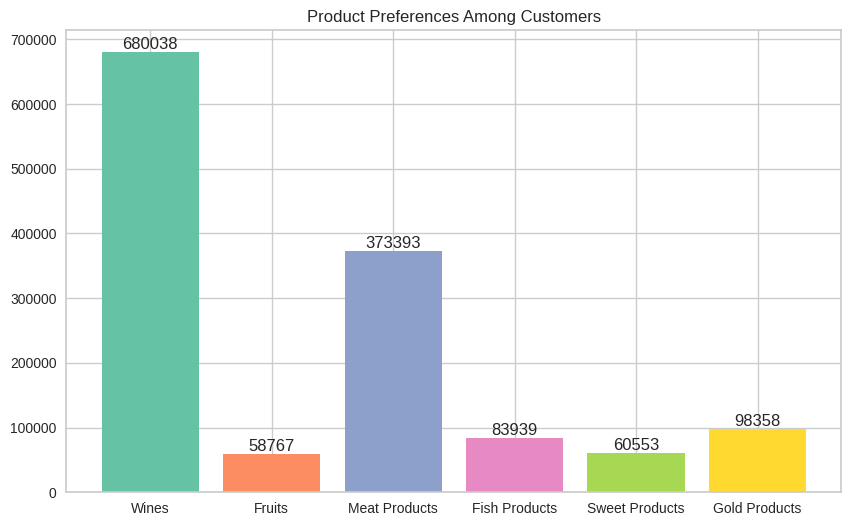

In [23]:
product_preferences = pd.DataFrame({
    'Wines': df['MntWines'].sum(),
    'Fruits': df['MntFruits'].sum(),
    'Meat Products': df['MntMeatProducts'].sum(),
    'Fish Products': df['MntFishProducts'].sum(),
    'Sweet Products': df['MntSweetProducts'].sum(),
    'Gold Products': df['MntGoldProds'].sum()
}, index=['Total'])

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(product_preferences.columns, product_preferences.loc['Total'], color=sns.color_palette('Set2', n_colors=len(product_preferences.columns)))

ax.bar_label(bars)
plt.title('Product Preferences Among Customers', fontsize=12);

**Wines** are the most popular category with the highest sales. Special promotions, premium options, and loyalty programs should be developed to cater to this product category.

**Meat Products** are the second most popular category. Cross-selling opportunities can be created, and demand can be increased through targeted campaigns and discounts.

**Fish and Gold Products** show moderate demand. VIP campaigns or special discounts can be recommended for gold products, while fish products may need more promotional support to boost sales.

**Fruits and Sweet Products** are the least preferred categories. Cross-selling strategies and healthy lifestyle-themed campaigns could be applied to increase sales in these product groups.

In summary, wine and meat products are the main revenue drivers, while cross-selling, promotions, and campaigns can be leveraged to boost sales in other categories.

## Which campaigns were successful?


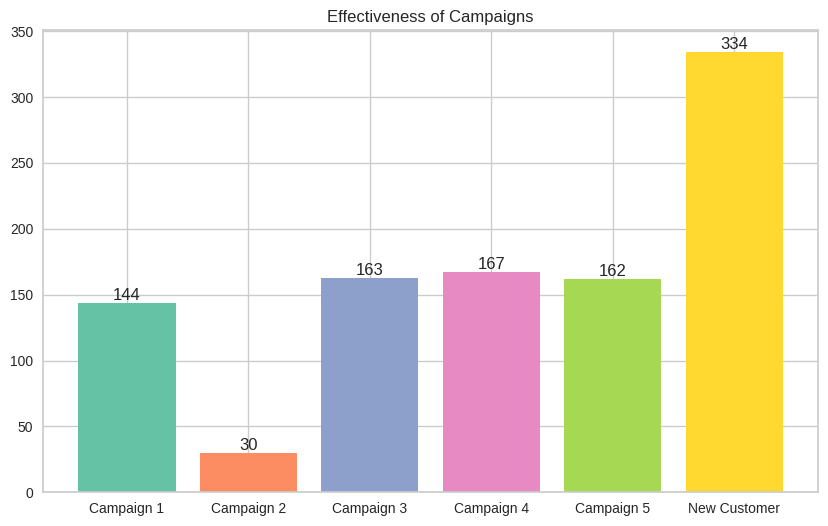

In [24]:
campaign_effectiveness = pd.DataFrame({
    'Campaign 1': df['AcceptedCmp1'].sum(),
    'Campaign 2': df['AcceptedCmp2'].sum(),
    'Campaign 3': df['AcceptedCmp3'].sum(),
    'Campaign 4': df['AcceptedCmp4'].sum(),
    'Campaign 5': df['AcceptedCmp5'].sum(),
    'New Customer': df['Response'].sum(),
}, index=['Total'])

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(campaign_effectiveness.columns, campaign_effectiveness.loc['Total'], color=sns.color_palette('Set2', n_colors=len(campaign_effectiveness.columns)))

ax.bar_label(bars)
plt.title('Effectiveness of Campaigns', fontsize=12)
plt.show()

**Campaign 1** was moderately successful, attracting 142 customers. While it garnered some attention, there is potential for improvement.

**Campaign 2** was the least effective, drawing only 30 customers. This suggests that either the campaign's message did not resonate with the audience or there were issues with its promotion.

**Campaigns 3, 4, and 5** showed similar effectiveness, each attracting around 160 customers. These campaigns performed better than Campaign 1 and significantly better than Campaign 2. They can be considered relatively successful, but there is still room for optimization.

**New Customer** Acquisition was by far the most effective strategy, attracting 333 customers. This indicates that efforts to attract new customers, possibly through a combination of various campaigns or promotions, have been highly successful.

## How do spending patterns vary by household size?

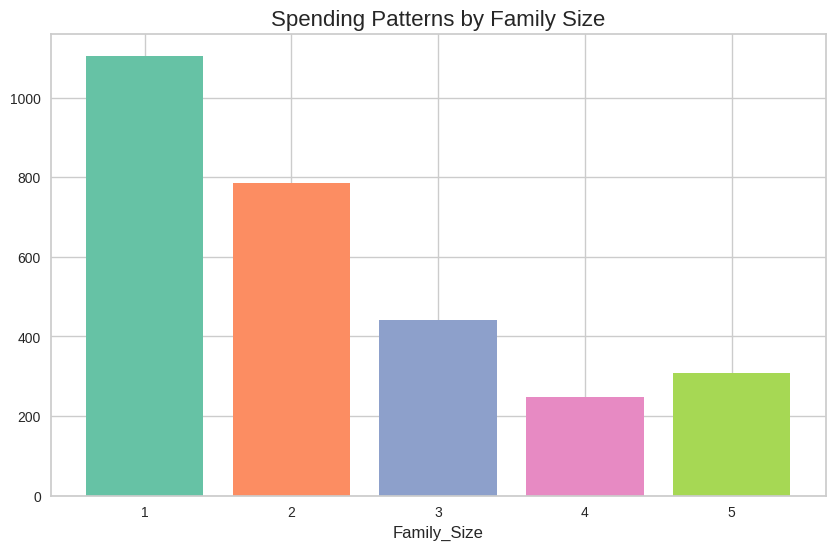

In [25]:
spending_by_family = df.groupby('Family_Size')['Total_Spending'].mean()

plt.figure(figsize=(10, 6))
plt.bar(spending_by_family.index, spending_by_family.values, color=sns.color_palette('Set2', n_colors=len(campaign_effectiveness.columns)))

plt.title('Spending Patterns by Family Size', fontsize=16)
plt.xlabel('Family_Size', fontsize=12);

**1-Person Households:** Given their high spending potential, this customer group can be targeted with luxury products, single-person campaigns, and premium services. Personalized marketing strategies could help increase spending in this group.

**2-3 Person Households:** Strategies for this group should target those who make moderate purchases, meeting family-related needs. Offers such as dual or family-focused campaigns (e.g., discounts on second items, family-sized packages) could help boost spending in this segment.

**4-5 Person Households:** For this lower-spending group, economic and bulk purchase-oriented campaigns could be more effective. Offers on bulk items, discounts on family essentials, and multi-item promotions could encourage spending. Additionally, campaigns focused on family members with multiple products could capture the interest of this segment.

## What are the categories of expenditure by education level?

In [26]:
spending_by_education = df.groupby('Education').agg({
    'MntWines': 'mean',
    'MntFruits': 'mean',
    'MntMeatProducts': 'mean',
    'MntFishProducts': 'mean',
    'MntSweetProducts': 'mean',
    'MntGoldProds': 'mean'
})

fig = px.bar(
    spending_by_education.reset_index(),
    x='Education',
    y=['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'],
    barmode='group',
    labels={'value': 'Average Spending', 'variable': 'Spending Category'},
    title="Expenditure Categories by Education Level"
)
fig.show()

**Postgraduate customers** spend the most on wine and meat products. Their preference for premium products is evident.

**Graduate customers** also spend significantly on wine and meat products, but slightly less than the postgraduate group.

**Undergraduate customers** are also interested in wine and meat products, but their spending is lower compared to the other g

## What is the relationship between income level and expenditure?

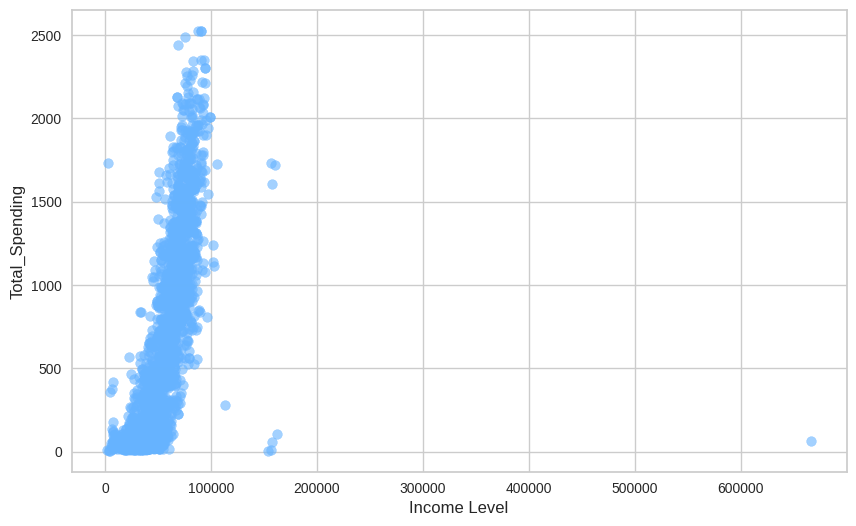

In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Income'], df['Total_Spending'], color='#66B3FF', alpha=0.6)
plt.xlabel('Income Level', fontsize=12)
plt.ylabel('Total_Spending', fontsize=12);

In [28]:
# Delete because there is only one value greater than 600000
df = df[(df["Income"]<600000)]

## What is the most used type of purchase?

Most common type of purchase: Store Purchases (12959 quantity)


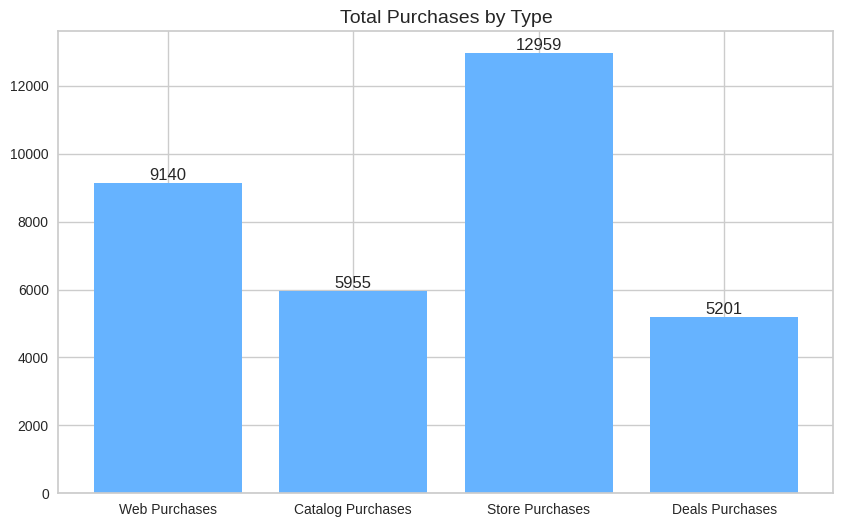

In [29]:
purchase_totals = {
    'Web Purchases': df['NumWebPurchases'].sum(),
    'Catalog Purchases': df['NumCatalogPurchases'].sum(),
    'Store Purchases': df['NumStorePurchases'].sum(),
    'Deals Purchases': df['NumDealsPurchases'].sum()
}

most_common_purchase = max(purchase_totals, key=purchase_totals.get)
print(f"Most common type of purchase: {most_common_purchase} ({purchase_totals[most_common_purchase]} quantity)")

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(purchase_totals.keys(), purchase_totals.values(), color='#66B3FF')
ax.bar_label(bars)

plt.title('Total Purchases by Type', fontsize=14);

Customers prefer in-store shopping the most (12,844 transactions), followed by web purchases (9,043 transactions). Catalog purchases (5,911 transactions) and deals purchases (5,142 transactions) are less popular but still hold a significant place. Overall, while physical stores remain the most preferred shopping channel, online purchases also account for a substantial share.

## How many customers register each month?

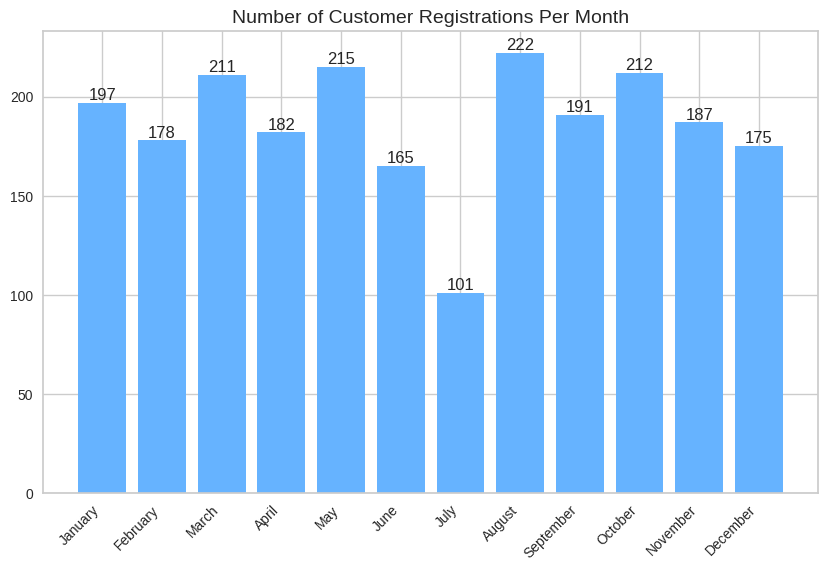

In [30]:
df['Month'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y').dt.month
monthly_registrations = df['Month'].value_counts().sort_index()
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_registrations.index = month_names

# Visualizing the results with a bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(monthly_registrations.index, monthly_registrations.values, color='#66B3FF')

ax.bar_label(bars)
plt.title('Number of Customer Registrations Per Month', fontsize=14)
plt.xticks(rotation=45, ha='right');


In general, there is a decrease in client registrations at the beginning of the summer months, but it increases again in the fall (August and September)

In [31]:
df.drop('Month', inplace=True, axis=1)

<a id='target'></a>
## <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#d00000; overflow:hidden"><b> 4.1 Data Preprocessing </b></div>

In [32]:
df1 = df.copy()

# Drop ID column all values are unique
df1 = df1.drop('ID',axis=1)

In [33]:
# log transformation for right skewed data

from sklearn.preprocessing import FunctionTransformer

def apply_transformation(data):
    trf = FunctionTransformer(func=np.log1p)

    for i in data:
        df1[i] = trf.fit_transform(df1[i])

apply_transformation(Numeric_columns)

df1.skew(numeric_only=True)

Income                 -1.261207
Kidhome                 0.636284
Teenhome                0.405903
Recency                -0.004299
MntWines               -0.550316
MntFruits               0.083568
MntMeatProducts        -0.084483
MntFishProducts        -0.052378
MntSweetProducts        0.084655
MntGoldProds           -0.343379
NumDealsPurchases       0.665689
NumWebPurchases        -0.265821
NumCatalogPurchases     0.131493
NumStorePurchases       0.700138
NumWebVisitsMonth       0.207904
AcceptedCmp3            3.287997
AcceptedCmp4            3.237901
AcceptedCmp5            3.300787
AcceptedCmp1            3.551553
AcceptedCmp2            8.464221
Complain               10.438160
Response                1.968607
Age                     0.092495
Total_Spending         -0.373476
Total_Children          0.415519
Family_Size             0.086348
TotalAcceptedCmp        1.922225
NumTotalPurchases       0.250406
dtype: float64

In [34]:
df1 = df1.drop([
    'Dt_Customer', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
    'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Kidhome',
    'Teenhome', 'Dt_Customer'
],axis=1)

df1.shape

(2236, 21)

In [35]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2236 entries, 0 to 2239
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2236 non-null   object 
 1   Income               2236 non-null   float64
 2   Recency              2236 non-null   int64  
 3   MntWines             2236 non-null   float64
 4   MntFruits            2236 non-null   float64
 5   MntMeatProducts      2236 non-null   float64
 6   MntFishProducts      2236 non-null   float64
 7   MntSweetProducts     2236 non-null   float64
 8   MntGoldProds         2236 non-null   float64
 9   NumDealsPurchases    2236 non-null   float64
 10  NumWebPurchases      2236 non-null   float64
 11  NumCatalogPurchases  2236 non-null   float64
 12  NumStorePurchases    2236 non-null   int64  
 13  NumWebVisitsMonth    2236 non-null   int64  
 14  Living_With          2236 non-null   object 
 15  Age                  2236 non-null   int64 

<a id='target'></a>
## <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#d00000; overflow:hidden"><b> 6. Scaling & Encoding </b></div>

In [36]:
# Encoding for Education
# 'Undergraduate','Graduate','Postgraduate' = 0,1,2 respectively 
from sklearn.preprocessing import OrdinalEncoder
o_encode = OrdinalEncoder(categories=[['Undergraduate','Graduate','Postgraduate']])

df1['Education'] = o_encode.fit_transform(df1[['Education']]).astype(int)

In [37]:
# Encoding for Living_With
from sklearn.preprocessing import LabelEncoder
lencode = LabelEncoder()
df1['Living_With'] = lencode.fit_transform(df1['Living_With'])

In [38]:
# Scaling

from sklearn.preprocessing import StandardScaler

# Assume X is your full dataset
scaler = StandardScaler()
df1 = scaler.fit_transform(df1)

<a id='target'></a>
## <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#d00000; overflow:hidden"><b> 7. Dimensionality Reduction </b></div>

<a id='target'></a>
## <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#d00000; overflow:hidden"><b> a) PCA </b></div>

In [39]:
pip install prince

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.8/417.8 kB 7.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 72.9 MB/s eta 0:00:00:00:010:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
category-encoders 2.7.0 requires scikit-learn<1.6.0,>=1.0.0, but you have scikit-learn 1.7.0 which is incompatible.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
sklearn-compat 0.1.3 requires scikit-learn<1.7,>=1.2, but you have scikit-learn 1.7.0 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [40]:
# we have to give data into dataframe format because prince library accept into dataframe format
# we use prince library for pca because we have categorical & numerical features

df1 = pd.DataFrame(df1)

# PCA doesn't select features — it transforms them.
# PCA creates new features (principal components) that are linear combinations of all your original features.

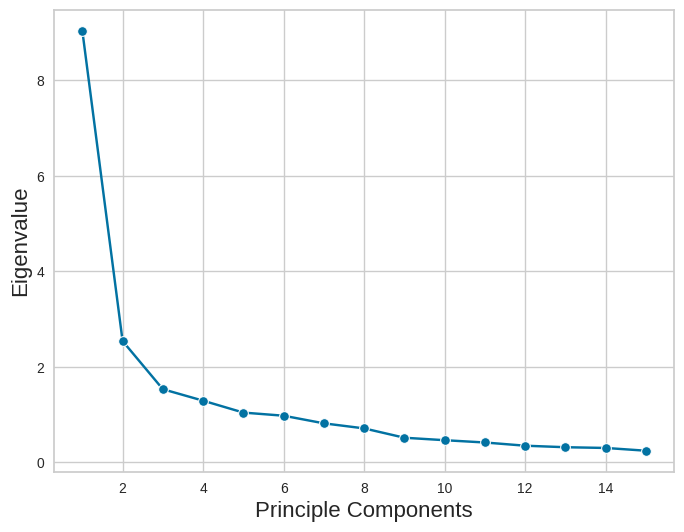

In [41]:
import prince
pca = prince.PCA(n_components=15, n_iter=10, rescale_with_mean=False,
rescale_with_std=False, copy=True,
engine = "sklearn" , random_state=42)

pca = pca.fit(df1)
eigeanvalues = pca.eigenvalues_


ev = pd.DataFrame()
ev["pca"] = range(1,16)
ev["eigenvalue"]=pd.DataFrame(pca.eigenvalues_)
plt.figure(figsize=(8,6))
sns.lineplot(x="pca", y = "eigenvalue", marker = "o", data= ev)
plt.ylabel("Eigenvalue", fontsize=16)
plt.xlabel("Principle Components", fontsize=16)
plt.show()

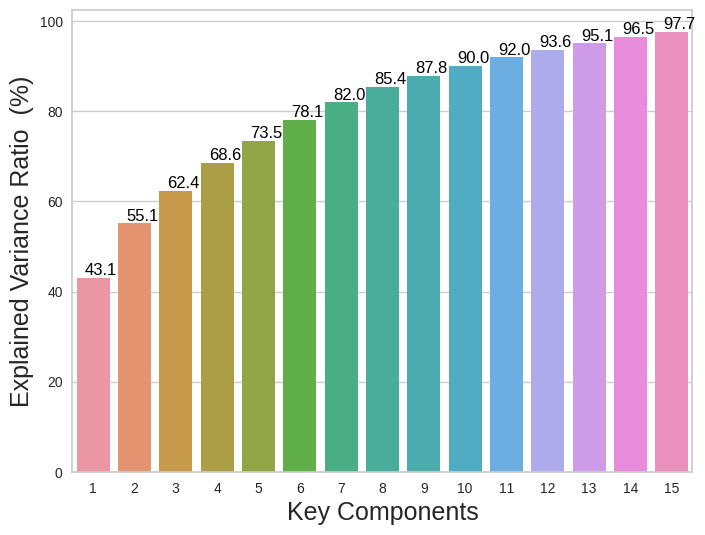

In [42]:
# avo: Explained variance ratio (cumulative)
# Rule of thumb How many principal components explain at least 80% variance?

avo = pd.DataFrame()
avo["pca"] = range(1,16)
avo["vari"] = pd.DataFrame(pca.cumulative_percentage_of_variance_)

plt.figure(figsize=(8,6))
graph = sns.barplot(x="pca", y ="vari", data=avo)

for p in graph.patches :
    graph.annotate('{:.1f}'.format(p.get_height()),(p.get_x()+0.2,p.get_height()),  va="bottom", color="black")

plt.ylabel("Explained Variance Ratio  (%)", fontsize=18)
plt.xlabel("Key Components", fontsize=18)
plt.show()  

It is possible to choose 2-3 components as the minimum number of components, because this is where the knee-jerk point occurs. In terms of optimal balance, choosing the first 6-7 components will explain most of the data set (around 83%).

As a rule of thumb, 80% or more explained variance can be considered as a threshold. I set it as 7.

In [43]:
# Recreating the PCA model with 7 components
from sklearn.decomposition import PCA

pca = PCA(n_components=7)
X_pca = pca.fit_transform(df1)
df_pca = pd.DataFrame(X_pca,columns=[f'PC{i+1}' for i in range(7)])
df_pca.head(5)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-4.020417,-0.526627,1.202524,1.946162,-1.003964,-0.345856,0.567044
1,3.581726,-0.091847,-0.940153,0.528730,-1.003183,-1.000776,1.561299
2,-2.945859,-0.638513,0.314935,-0.723918,0.256865,-1.102566,-0.148519
3,2.948690,-0.669645,0.927571,-0.731749,0.851641,-0.507098,-0.801773
4,-1.254461,1.181747,0.711317,-0.518843,-0.987791,0.890557,-1.910153


In [44]:
# I will continue with the first 3 components.
dfK = df_pca[['PC1', 'PC2', 'PC3']]

<a id='target'></a>
## <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#d00000; overflow:hidden"><b> 8. KMeans Clustering  </b></div>

In [ ]:
# Elbow metod

sse = []  
k_range = range(2,10) 
for k in k_range:                                         
    model = KMeans(n_clusters = k, random_state=42)
    model.fit(dfK)
    sse.append(model.inertia_)
    
plt.plot(k_range, sse, marker='o')
plt.xlabel("Different k values")
plt.ylabel("inertia-error")
plt.title("Elbow method")
plt.show()

### Elbow Point:
#### The most significant reduction in inertia occurs between k=2k=2 and k=4k=4.
#### The curve likely flattens after k=4k=4, indicating diminishing returns for higher kk.

### Optimal k=4
#### This is where the inertia starts to plateau, balancing cluster cohesion and simplicity.
#### While increasing k (e.g., to 5, 6, etc.) might marginally reduce inertia, it risks overfitting.

In [46]:
model = KMeans(n_clusters = 4, random_state=42)
model.fit_predict(dfK)
cluster = model.labels_ 
dfK["predicted_clusters_kmeans"] = cluster
dfK["predicted_clusters_kmeans"].sample(5)

1993    1
1301    1
234     3
1622    0
1403    2
Name: predicted_clusters_kmeans, dtype: int32

Text(0.5, 1.0, 'PCA Component 1 vs Component 2')

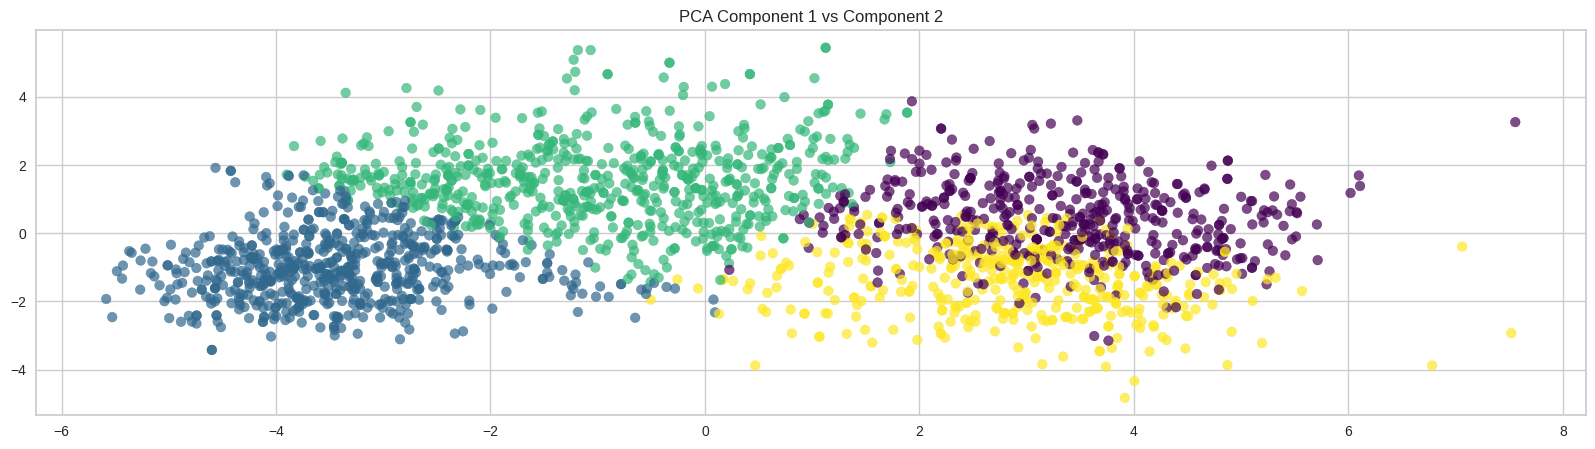

In [47]:
# Visualize Clusters

plt.figure(figsize=(20, 5))

# subplot 1: PC1 vs PC2
plt.scatter(dfK["PC1"], dfK["PC2"], c=dfK['predicted_clusters_kmeans'], cmap="viridis", alpha=0.7)
#plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.title('PCA Component 1 vs Component 2')

In [48]:
# Silhouette analysis

range_n_clusters = range(3,7)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(dfK)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(dfK, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=3, the silhouette score is 0.37400770466867644
For n_clusters=4, the silhouette score is 0.42015056393726075
For n_clusters=5, the silhouette score is 0.37643327717354325
For n_clusters=6, the silhouette score is 0.36083226772455296


In general, Component 1 stands out as the strongest discriminator in this clustering analysis after dimensionality reduction with PCA. Other components may be weaker in separating the differences between the data.


<a id='target'></a>
## <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#d00000; overflow:hidden"><b> 9. DBSCAN  </b></div>

In [49]:
from sklearn.cluster import DBSCAN

model = DBSCAN(eps=0.5, min_samples=4)
model.fit_predict(dfK)
cluster = model.labels_

dfK["predicted_clusters_dbscan"] = cluster
dfK["predicted_clusters_dbscan"].sample(5)

2053    0
1893    2
877     2
854     8
216    -1
Name: predicted_clusters_dbscan, dtype: int64

Text(0.5, 1.0, 'PCA Component 1 vs Component 2')

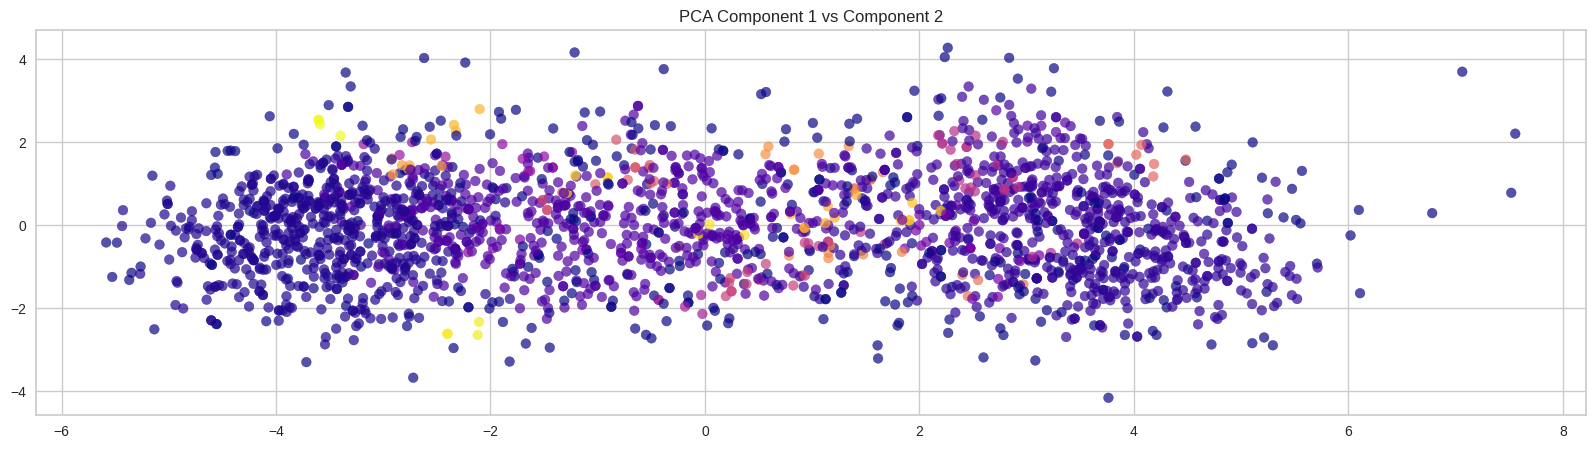

In [50]:
# Visualize Clusters

plt.figure(figsize=(20, 5))

# subplot 1: PC1 vs PC2
plt.scatter(dfK["PC1"], dfK["PC3"], c=dfK['predicted_clusters_dbscan'], cmap="plasma", alpha=0.7)
#plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.title('PCA Component 1 vs Component 2')

In [51]:
# Silhouette analysis

range_n_clusters = range(2,7)
for sample in range_n_clusters:
    # intialise kmeans
    dbscan = DBSCAN(eps=0.5,min_samples=sample)
    dbscan.fit(dfK)
    cluster_labels = dbscan.labels_
    # silhouette score
    silhouette_avg = silhouette_score(dfK, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=6, the silhouette score is 0.1955378858160729
For n_clusters=6, the silhouette score is 0.19301436578825606
For n_clusters=6, the silhouette score is 0.39337500333188913
For n_clusters=6, the silhouette score is 0.027977099748213996
For n_clusters=6, the silhouette score is -0.1218172867853556


<a id='target'></a>
## <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#d00000; overflow:hidden"><b> 10. Name the Category  </b></div>

We get the output of kmeans 

RFM score is a marketing analytics technique used to analyze and segment customers based on their purchasing behavior.

R: Recency – How recently a customer made a purchase

F: Frequency – How often they purchase

M: Monetary – How much money they spend

-- customer segments 
1. high_value_engaged
2. promising_new
3. at_risk
4. inactive

In [52]:
recency = df['Recency']

frequency = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df[
    'NumStorePurchases'] + df['NumDealsPurchases']

monetary = df['Total_Spending']

# Dataframe of rfm
rfm_df = pd.DataFrame({
    'CustomerID': df['ID'],
    'Recency': recency,
    'Frequency': frequency,
    'Monetary': monetary
})

# Rank to rfm and store into dataframe using qcut

rfm_df['R_rank'] = pd.qcut(rfm_df['Recency'], 5, labels=[5, 4, 3, 2, 1])
rfm_df['F_rank'] = pd.qcut(rfm_df['Frequency'].rank(method='first'),
                           5,
                           labels=[1, 2, 3, 4, 5])
rfm_df['M_rank'] = pd.qcut(rfm_df['Monetary'].rank(method='first'),
                           5,
                           labels=[1, 2, 3, 4, 5])

# Calculate the final RFM score
rfm_df['RFM_Score'] = rfm_df['R_rank'].astype(str) + rfm_df['F_rank'].astype(
    str) + rfm_df['M_rank'].astype(str)

rfm_df.head()

,CustomerID,Recency,Frequency,Monetary,R_rank,F_rank,M_rank,RFM_Score
0,5524,58,25,1617,3,5,5,355
1,2174,38,6,27,4,1,1,411
2,4141,26,21,776,4,4,4,444
3,6182,26,8,53,4,2,1,421
4,5324,94,19,422,1,4,3,143


-- customer segments 
1. high_value_engaged
2. promising_new
3. at_risk
4. inactive

In [53]:
def assign_rfm_segment(row):
    r = int(row['R_rank'])
    f = int(row['F_rank'])

    # High-value and engaged: top recency and frequency
    if r >= 4 and f >= 4:
        return 'high_value_engaged'

    # Promising new: recent but not frequent yet
    elif r >= 4 and f <= 2:
        return 'promising_new'

    # At risk: low recency but used to be frequent
    elif r <= 2 and f >= 3:
        return 'at_risk'

    # Inactive: low recency and low frequency
    elif r <= 2 and f <= 2:
        return 'inactive'

    # Default fallback
    else:
        return 'inactive'


rfm_df['Segment'] = rfm_df.apply(assign_rfm_segment, axis=1)
rfm_df[['CustomerID', 'RFM_Score', 'Segment']].head()

,CustomerID,RFM_Score,Segment
0,5524,355,inactive
1,2174,411,promising_new
2,4141,444,high_value_engaged
3,6182,421,promising_new
4,5324,143,at_risk


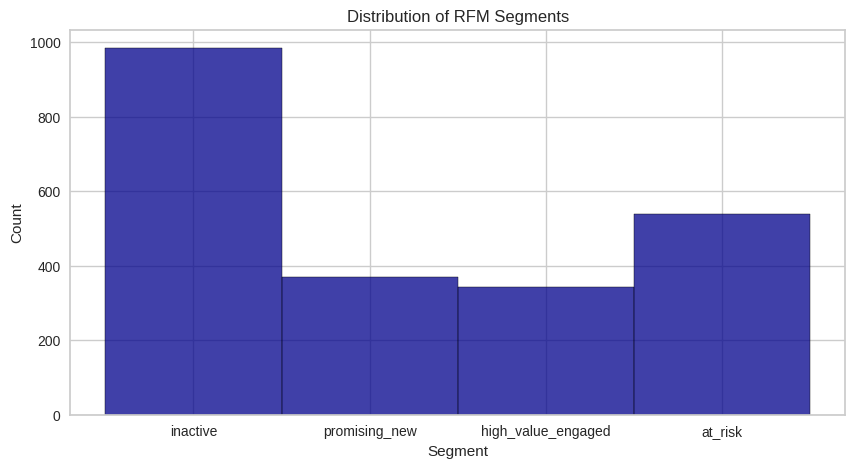

In [54]:
plt.figure(figsize=(10,5))
sns.histplot(rfm_df['Segment'],color='darkblue')
plt.title('Distribution of RFM Segments')
plt.ylabel('Count')
plt.xlabel('Segment')
plt.show()